In [14]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from warnings import simplefilter


In [10]:
simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


df = pd.read_csv('Nat_Gas.csv', parse_dates=["Dates"]) #parse_dates converts the Dates column into datetime object


# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
df = df.set_index("Dates") # set the Dates column as the index


# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
df.to_period() # emphasizes the periodicity of the dataframe




,Prices
Dates,
2020-10,10.10
2020-11,10.30
2020-12,11.00
2021-01,10.90
2021-02,10.90
2021-03,10.90
2021-04,10.40
2021-05,9.84
2021-06,10.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [13]:
# create time-step column
df['Time'] = np.arange(len(df.index))

df

,Prices,Time
Dates,,
2020-10-31,10.10,0
2020-11-30,10.30,1
2020-12-31,11.00,2
2021-01-31,10.90,3
2021-02-28,10.90,4
2021-03-31,10.90,5
2021-04-30,10.40,6
2021-05-31,9.84,7
2021-06-30,10.00,8


In [15]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Prices']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

y_pred

Dates
2020-10-31    10.290272
2020-11-30    10.329285
2020-12-31    10.368299
2021-01-31    10.407312
2021-02-28    10.446325
2021-03-31    10.485338
2021-04-30    10.524352
2021-05-31    10.563365
2021-06-30    10.602378
2021-07-31    10.641391
2021-08-31    10.680405
2021-09-30    10.719418
2021-10-31    10.758431
2021-11-30    10.797444
2021-12-31    10.836458
2022-01-31    10.875471
2022-02-28    10.914484
2022-03-31    10.953497
2022-04-30    10.992510
2022-05-31    11.031524
2022-06-30    11.070537
2022-07-31    11.109550
2022-08-31    11.148563
2022-09-30    11.187577
2022-10-31    11.226590
2022-11-30    11.265603
2022-12-31    11.304616
2023-01-31    11.343630
2023-02-28    11.382643
2023-03-31    11.421656
2023-04-30    11.460669
2023-05-31    11.499683
2023-06-30    11.538696
2023-07-31    11.577709
2023-08-31    11.616722
2023-09-30    11.655736
2023-10-31    11.694749
2023-11-30    11.733762
2023-12-31    11.772775
2024-01-31    11.811789
2024-02-29    11.850802
2024-03-31

In [16]:
# extend to 2025-09-30 for extrapolation

#create dataframe for extrapolation
X_extrapolate = pd.DataFrame(index=pd.date_range(start='2024-10-30', periods=12, freq='M') , columns=X.columns, data=np.arange(start=48,stop=60))


X_input = pd.concat([X, X_extrapolate],axis=0) # append X_extrapolate to X (features dataframe)

y_pred = pd.Series(model.predict(X_input), index=X_input.index)

y_pred # with extrapolated data

2020-10-31    10.290272
2020-11-30    10.329285
2020-12-31    10.368299
2021-01-31    10.407312
2021-02-28    10.446325
2021-03-31    10.485338
2021-04-30    10.524352
2021-05-31    10.563365
2021-06-30    10.602378
2021-07-31    10.641391
2021-08-31    10.680405
2021-09-30    10.719418
2021-10-31    10.758431
2021-11-30    10.797444
2021-12-31    10.836458
2022-01-31    10.875471
2022-02-28    10.914484
2022-03-31    10.953497
2022-04-30    10.992510
2022-05-31    11.031524
2022-06-30    11.070537
2022-07-31    11.109550
2022-08-31    11.148563
2022-09-30    11.187577
2022-10-31    11.226590
2022-11-30    11.265603
2022-12-31    11.304616
2023-01-31    11.343630
2023-02-28    11.382643
2023-03-31    11.421656
2023-04-30    11.460669
2023-05-31    11.499683
2023-06-30    11.538696
2023-07-31    11.577709
2023-08-31    11.616722
2023-09-30    11.655736
2023-10-31    11.694749
2023-11-30    11.733762
2023-12-31    11.772775
2024-01-31    11.811789
2024-02-29    11.850802
2024-03-31    11

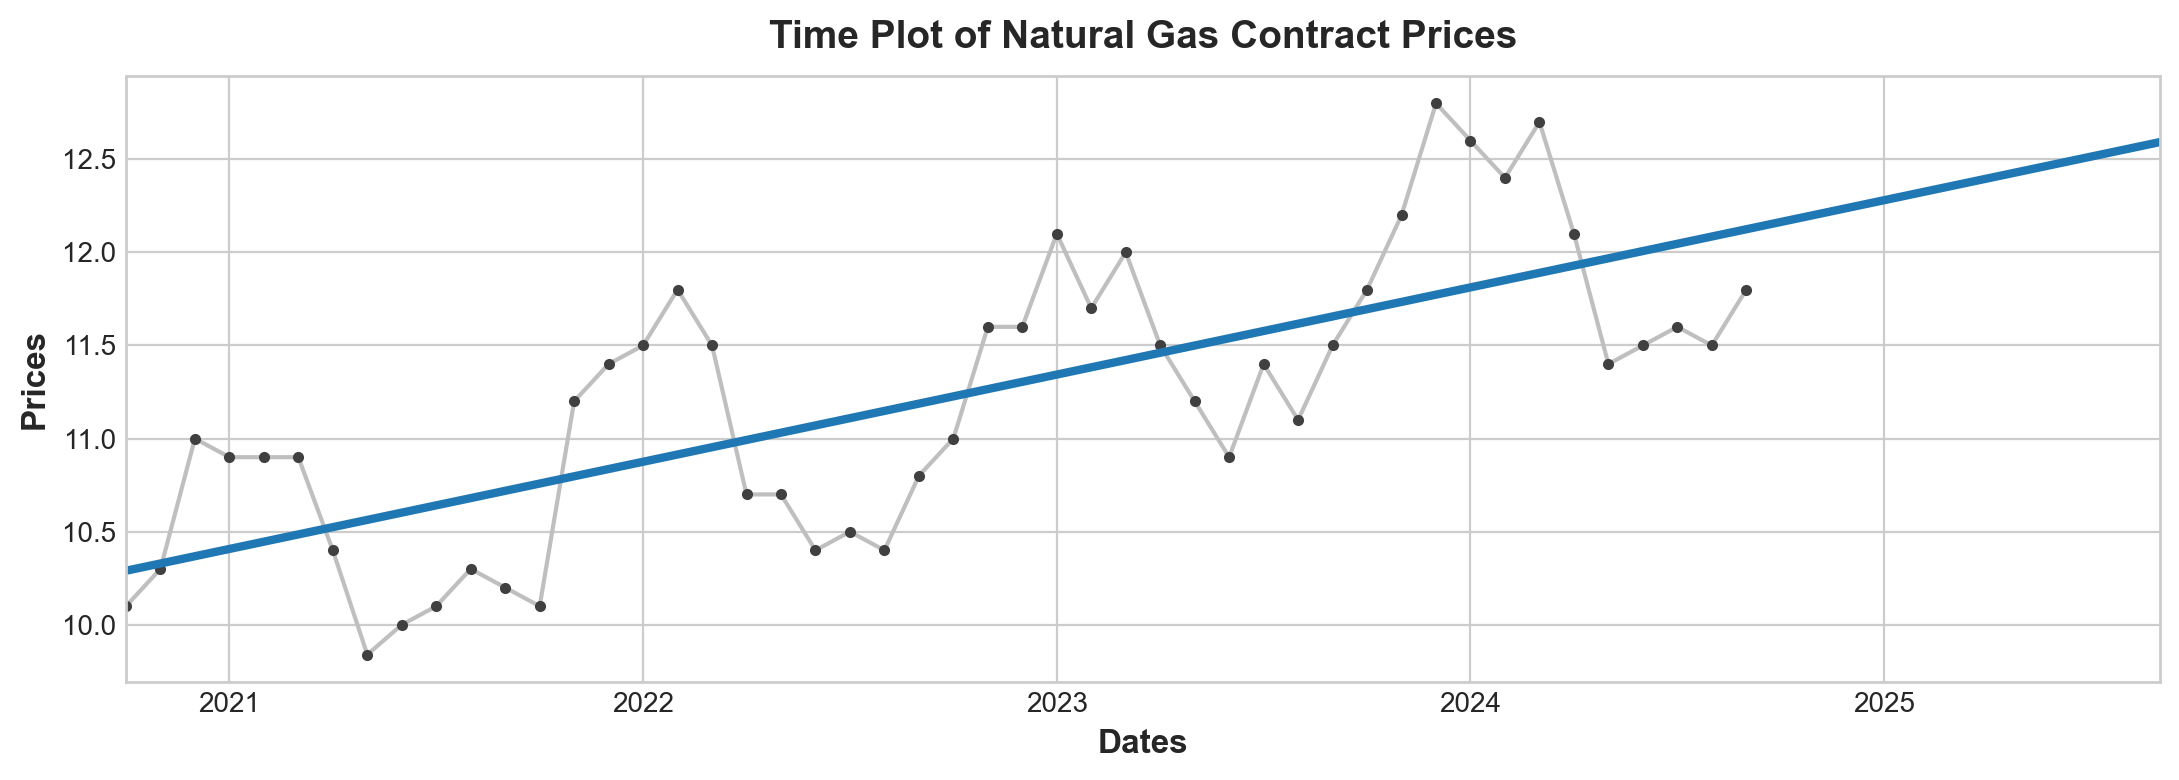

In [17]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_ylabel('Prices')
ax.set_title('Time Plot of Natural Gas Contract Prices');

In [19]:
#Conclusion - y_pred is the dataframe that inputs dates and outputs estimated Natural Gas Contract Prices

#e.g.
y_pred['2021-01-31'].round(2) # past date

10.41

In [20]:
#e.g.
y_pred['2025-08-31'].round(2) # future date

12.55